In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [84]:
data = pd.read_csv("/content/bank-full.csv", sep=";")

In [85]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [86]:
data.shape

(45211, 17)

In [87]:
data.isnull().values.any()

False

In [89]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Text(0, 0.5, 'Frequency')

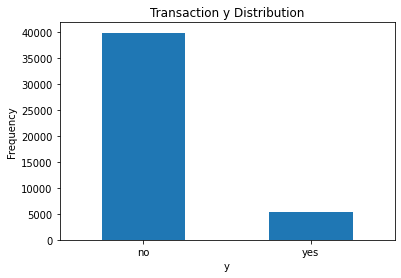

In [90]:
count_classes = pd.value_counts(data['y'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction y Distribution")
plt.xlabel("y")
plt.ylabel("Frequency")

In [91]:
data.drop(columns =['job', 'marital','education','default','housing','loan','contact','month','poutcome'], axis=1, inplace=True)

In [106]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [107]:
#### Independent and Dependent Features
X=data.drop("y",axis=1)

In [108]:
X.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [109]:
y=data.y

In [110]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [111]:
y.shape

(45211,)

In [112]:
from sklearn.model_selection import train_test_split
import warnings

In [117]:
#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [118]:
# summarize class distribution
print("Before oversampling: ",Counter(y_train))

Before oversampling:  Counter({'no': 27996, 'yes': 3651})


## SMOTE (Synthetic Minority Oversampling Technique)

This technique considered as one of the most popular and influential data sampling algorithms in ML and data mining. With SMOTE, the minority class is over-sampled by creating “synthetic” examples rather than by over-sampling with replacement

In [122]:
from imblearn.over_sampling import SMOTE

In [123]:
# define oversampling strategy
smote = SMOTE()

In [124]:
# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [125]:
X_train_SMOTE.shape, y_train_SMOTE.shape

((55992, 7), (55992,))

In [126]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()

In [127]:
# Create the model with 100 trees
model = RandomForestClassifier()

In [128]:
# Fit on training data
model.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [129]:
# Actual class predictions
y_pred = model.predict(X_test)

In [131]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [133]:
print(confusion_matrix(y_test,y_pred))

[[10271  1655]
 [  515  1123]]


In [134]:
print(accuracy_score(y_test,y_pred))

0.840017693895606


In [135]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.95      0.86      0.90     11926
         yes       0.40      0.69      0.51      1638

    accuracy                           0.84     13564
   macro avg       0.68      0.77      0.71     13564
weighted avg       0.89      0.84      0.86     13564



# Over Sampling

In [136]:
from imblearn.over_sampling import RandomOverSampler

In [137]:
os=RandomOverSampler()

In [138]:
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [139]:
X_train_ns.shape,y_train_ns.shape

((55992, 7), (55992,))

In [140]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({'no': 27996, 'yes': 3651})
The number of classes after fit Counter({'no': 27996, 'yes': 27996})


In [141]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [142]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[11359   567]
 [  871   767]]
0.8939840754939545
              precision    recall  f1-score   support

          no       0.93      0.95      0.94     11926
         yes       0.57      0.47      0.52      1638

    accuracy                           0.89     13564
   macro avg       0.75      0.71      0.73     13564
weighted avg       0.89      0.89      0.89     13564

